# K-means

In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
def init_centroids(X, k):
    c = X[np.random.permutation(X.shape[0])[:k]]
    return c


def distance(x,y):
    n = x.shape[0]
    d = np.sum([(x[i] - y[i])**2 for i in range(n)])
    return d


def get_closest_centroids(X, centroids):
    m = X.shape[0]
    idx = np.zeros((m,), dtype=int)
    cost = 0.
    for i in range(m):
        d = [distance(X[i], c) for c in centroids]
        idx[i] = d.index(min(d))
        cost += min(d) * 1. / m
    return idx, cost


def show_clustering(X, centroids, idx):
    colors = ['r', 'b', 'g', 'c', 'y', 'm']
    k = centroids.shape[0]
    for j in range(k):
        plt.scatter(X[np.where(idx==j)][:, 0], X[np.where(idx==j)][:, 1], c=colors[j%6], marker='x')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', c='r')
    plt.title('Clustering for k={0}'.format(k))
    plt.show()


def k_means(X, k, n_iter=20, n_init=1, plot=True):
    if n_init > 1:
        plot = False
    idx_list = []
    centroids_list = []
    costs_list = []
    
    for init in range(n_init):
        
        centroids = init_centroids(X, k)
        costs = []
        for it in range(n_iter):
            old = centroids.copy()
            idx, cost = get_closest_centroids(X, centroids)
            costs.append(cost)
            for j in range(k):
                centroids[j] = np.mean(X[np.where(idx==j)], axis=0)
                if plot:
                    plt.plot([old[j, 0], centroids[j, 0]], [old[j, 1], centroids[j, 1]], marker='.', c='k')
        idx, cost = get_closest_centroids(X, centroids)
        costs = costs[1:]
        costs.append(cost)

        if plot:
            show_clustering(X, centroids, idx)
            
        idx_list.append(idx)
        centroids_list.append(centroids)
        costs_list.append(costs)
    
    temp = [c[-1] for c in costs_list]
    best = temp.index(min(temp))
    
    idx = idx_list[best]
    centroids = centroids_list[best]
    costs = costs_list[best]

    return idx, centroids, costs

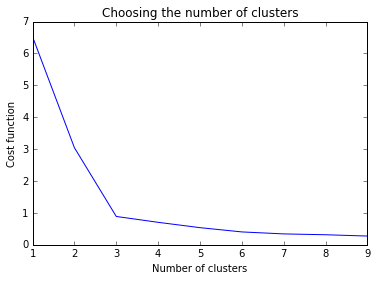

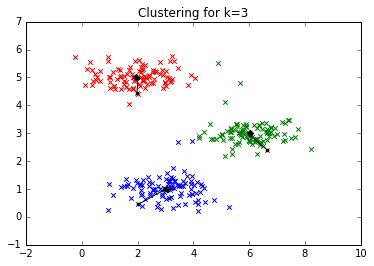

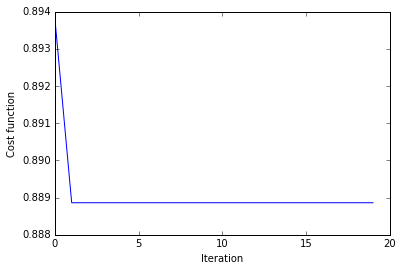

In [3]:
from scipy.io import loadmat

data = loadmat('ex7data2.mat')
X = data['X']

k_costs = []
for k in range(1,10):
    idx, centroids, costs = k_means(X, k, n_init=10)
    k_costs.append(costs[-1])
    
plt.plot(range(1,len(k_costs)+1), k_costs)
plt.xlabel('Number of clusters')
plt.ylabel('Cost function')
plt.title('Choosing the number of clusters')
plt.show()

k = 3
idx, centroids, costs = k_means(X, k)
plt.plot(range(len(costs)), costs)
plt.xlabel('Iteration')
plt.ylabel('Cost function')
plt.show()

# Image compression

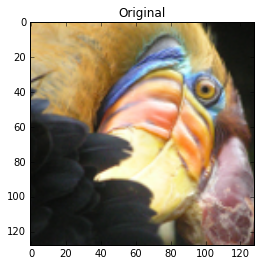

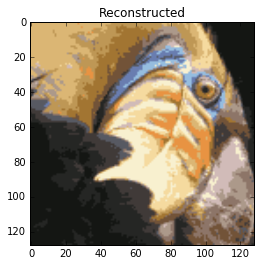

In [4]:
img = loadmat('bird_small.mat')['A']
plt.imshow(img)
plt.title('Original')
plt.show()

X = img.reshape((16384, 3)) / 255.
k = 16
idx, centroids, costs = k_means(X, k, n_iter=100, n_init=3)
centroids = (255 * centroids).astype(np.uint8)
img_reconstructed = np.zeros_like(X, dtype=np.uint8)
for i in range(img_reconstructed.shape[0]):
    img_reconstructed[i] = centroids[idx[i]]
img_reconstructed = img_reconstructed.reshape((128,128,3))
plt.imshow(img_reconstructed)
plt.title('Reconstructed')
plt.show()

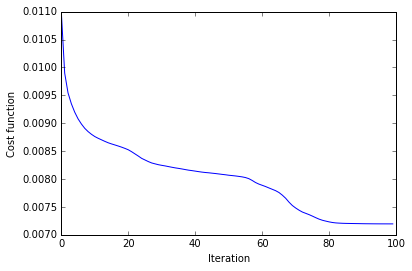

In [5]:
plt.plot(range(len(costs)), costs)
plt.xlabel('Iteration')
plt.ylabel('Cost function')
plt.show()